# Exploratory data analysis

In [1]:
# Libraries
import pandas as pd
import numpy as np
import janitor
from pandas_profiling import ProfileReport as report
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from helpers import bivar_plotter, merger, green_space_plotter

In [2]:
# Read in distance to green spaces
distance = pd.read_csv("data/green_spaces.csv").clean_names()

# Change distance to green space column to unify format with the other datasets
distance['walking_distance_to_nearest_greenspace'] = pd.Series([
    'Less than 10 minutes' if i in ['A 5 minute walk or less', 'Within a 6-10 minute walk']
    else 'More than 10 minutes' if i == 'An 11 minute walk or more'
    else "Don't know" for i in distance.distance_to_nearest_green_or_blue_space])

# The age column is not present in the other datasets and it arguably overlaps with other features. Drop it.
distance = distance.query("age == 'All'").drop(columns=['distance_to_nearest_green_or_blue_space', 'age']).copy()

# Read in neighbourhood ratings
neighbourhood = pd.read_csv("data/neighbourhood_rating.csv").clean_names()

#Read in community ratings
community = pd.read_csv("data/community_belonging.csv").clean_names()

## Creating a single dataset
The function `merger()` joins the three datasets together in preparation for analysis.

In [3]:
survey = merger(distance, community, neighbourhood)
survey.sample(20)

,datecode,value,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,walking_distance_to_nearest_greenspace,community_belonging,neighbourhood_rating
30497,2019,66.0,All,All,All,All,All,White,Less than 10 minutes,All,All
63316,2013,19.0,All,All,All,All,Adults,All,All,Not very strongly,All
83044,2018,0.0,All,All,All,Owned Mortgage/Loan,All,All,All,All,Very poor
82414,2014,3.0,All,All,All,All,All,Other,All,All,Very poor
103945,2018,0.0,All,All,All,Private Rented,All,All,All,All,No opinion
81406,2017,1.0,All,All,All,All,All,Other,All,All,Very poor
103273,2017,0.0,All,All,All,Private Rented,All,All,All,All,No opinion
55767,2016,18.0,Male,All,All,All,All,All,All,Not very strongly,All
17613,2015,20.0,All,All,All,All,All,All,Less than 10 minutes,All,All
44818,2019,9.0,All,All,20% most deprived,All,All,All,All,Not at all strongly,All


As we see, data contains a column `value` that contains the percentage of adults that gave a certain answer to question 2 given their answer to question 1, while other variables are held constant.

In [4]:
survey.query("walking_distance_to_nearest_greenspace == 'More than 10 minutes' & household_type == 'Adults'")

,datecode,value,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,walking_distance_to_nearest_greenspace,community_belonging,neighbourhood_rating
16814,2018,12.0,All,All,All,All,Adults,All,More than 10 minutes,All,All
16838,2015,11.0,All,All,All,All,Adults,All,More than 10 minutes,All,All
20395,2017,14.0,All,All,All,All,Adults,All,More than 10 minutes,All,All
21282,2019,11.0,All,All,All,All,Adults,All,More than 10 minutes,All,All
21393,2013,11.0,All,All,All,All,Adults,All,More than 10 minutes,All,All
24729,2014,10.0,All,All,All,All,Adults,All,More than 10 minutes,All,All
29043,2016,13.0,All,All,All,All,Adults,All,More than 10 minutes,All,All


<AxesSubplot:xlabel='walking_distance_to_nearest_greenspace', ylabel='value'>

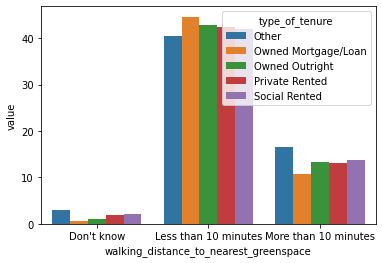

In [7]:
bivar_plotter(survey, 'walking_distance_to_nearest_greenspace', 'type_of_tenure')

In [6]:
colnames = ['gender', 'urban_rural_classification', 'simd_quintiles', 'type_of_tenure', 'household_type',
            'ethnicity', 'community_belonging', 'neighbourhood_rating']

urban = (
    survey.query("type_of_tenure != 'All' & walking_distance_to_nearest_greenspace == 'More than 10 minutes'")
        .groupby(['datecode', 'type_of_tenure'])
        .mean('value').reset_index()
)

gender = (
    survey.query("gender != 'All' & walking_distance_to_nearest_greenspace == 'More than 10 minutes'")
        .groupby(['datecode', 'gender'])
        .mean('value').reset_index()
)

table = gender.join(urban, lsuffix=('_'+'gender'))

table.pivot()

TypeError: pivot() missing 1 required argument: 'columns'

In [ ]:


for col in colnames:
    df = (
    survey.query(f"{col} != 'All' & walking_distance_to_nearest_greenspace == 'More than 10 minutes'")
        .groupby(['datecode', col])
        .mean('value')
    )
    print(df)
    

   
